In [11]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from os import listdir
from os.path import isfile

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [5]:
dir = "../Resources/"

In [6]:
all_files = [x for x in listdir(dir) if (".xlsx" in x or ".csv" in x)]
all_files

['corn.xlsx',
 'live cattle.xlsx',
 'corn_2.xlsx',
 'feeder cattle.xlsx',
 'soybean meal.xlsx',
 'lean hogs.xlsx']

In [7]:
all_df = pd.DataFrame()
for x in all_files:
    a = x.replace(".xlsx", "")
    df = pd.read_excel(dir+x)
    df["name"] = a
    df["Date"] = pd.to_datetime(df["Date"])
    df = df.set_index("Date")
    df = df.sort_index()
    df = df.dropna()
    df = df[df['Volume'] != 0.0]
    df.drop(['Volume'], axis=1, inplace=True)
    if a == "corn_2":
        corn = df
        all_df["corn"] = corn["Price"]
    elif a == "live cattle":
        live_cattle = df
        all_df["live_cattle"] = live_cattle["Price"]
    elif a == "feeder cattle":
        feeder_cattle = df
        all_df["feeder_cattle"] = feeder_cattle["Price"]
    elif a == "soybean meal":
        soybean = df
        all_df["soybean"] = soybean["Price"]
    elif a == "lean hogs":
        hog = df
        all_df["hog"] = hog["Price"]

In [ ]:
all_df.head()

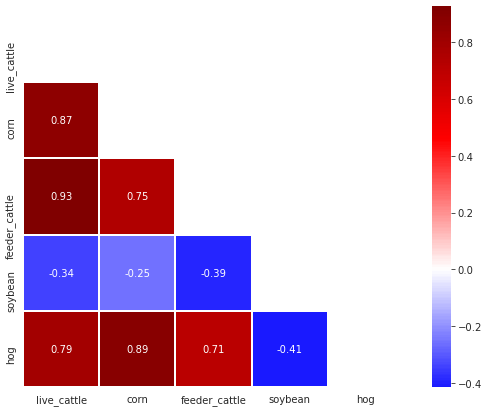

In [13]:
all_df = all_df.dropna()
corrM = all_df.corr()

mask = np.zeros_like(corrM)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10,7))
    ax = sns.heatmap(corrM, mask=mask, center=0, annot=True, square=True, linewidths=1, cmap="seismic")

In [ ]:
# live_cattle.head()
# live_cattle.plot(figsize=(8, 6))

In [ ]:
# feeder_cattle.head()
# feeder_cattle.plot(figsize=(8, 6))

In [ ]:
# soybean.head()
# soybean.plot(figsize=(8, 6))

In [ ]:
# hog.head()
# hog.plot(figsize=(8, 6))